# Boosting Methods

Boosting is a concept, not a machine learning algorithm.

It is a strong model-building method with iterations, 

taking into account the errors of weak algorithms created in the same data set.

It combines the outputs from weak learners and creates a strong learner,

which eventually improves the prediction power of the model. 

### In the Bagging method,
trees obtain their results independently from each other.
### In Boosting, 
each tree uses the results of the previous one. So trees are dependent on each other.

# Gradient Boosting

-->Everything starts with a leaf, not a stump,

-->You can create larger trees than Adaboost,

-->Weak learners have the same learning rate,

-->The training for gradual series learning is based on the residuals of the previous model.

In [1]:
# Necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score

warnings.simplefilter(action='ignore', category=Warning)
from sklearn.model_selection import learning_curve
#pd.set_option('display.float_format', lambda x: '%.1f' % x)

The sqfeet and rent values of a house are given. Our aim is to estimate the rent value correctly when the sqfeet value is given.

In [2]:
df=pd.read_csv("ionosphere.csv")
df

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
df.shape

(351, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a01     351 non-null    int64  
 1   a02     351 non-null    int64  
 2   a03     351 non-null    float64
 3   a04     351 non-null    float64
 4   a05     351 non-null    float64
 5   a06     351 non-null    float64
 6   a07     351 non-null    float64
 7   a08     351 non-null    float64
 8   a09     351 non-null    float64
 9   a10     351 non-null    float64
 10  a11     351 non-null    float64
 11  a12     351 non-null    float64
 12  a13     351 non-null    float64
 13  a14     351 non-null    float64
 14  a15     351 non-null    float64
 15  a16     351 non-null    float64
 16  a17     351 non-null    float64
 17  a18     351 non-null    float64
 18  a19     351 non-null    float64
 19  a20     351 non-null    float64
 20  a21     351 non-null    float64
 21  a22     351 non-null    float64
 22  a2

In [5]:
df.isnull().any().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a01,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
a02,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
a03,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
a04,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
a05,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
a06,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
a07,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
a08,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
a09,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
a10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


In [7]:
df["class"].value_counts()
#imbalanced dataset

g    225
b    126
Name: class, dtype: int64

In [8]:
# converting from string to numeric
df["class"]=df["class"].map({"g":1,"b":0})

<AxesSubplot:>

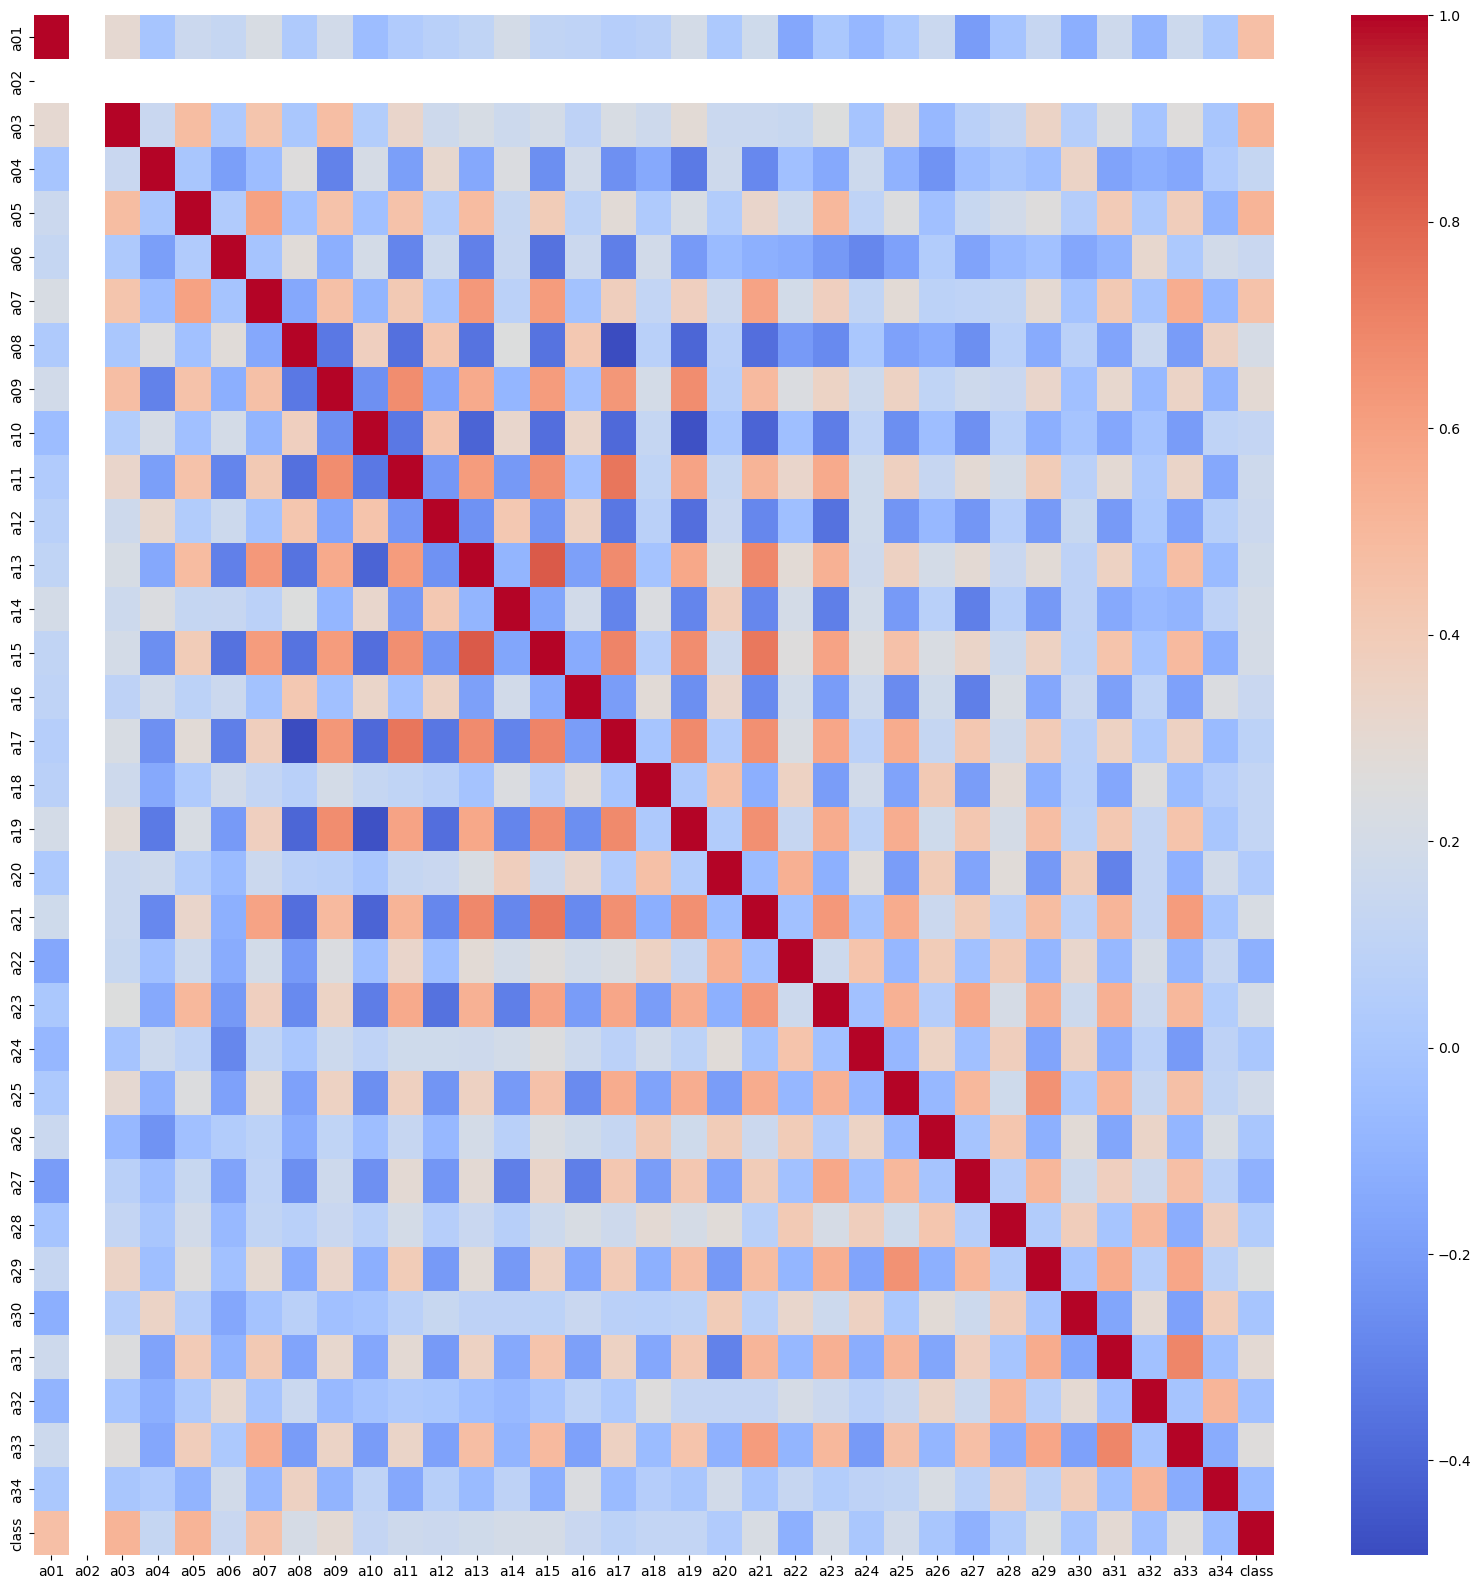

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="coolwarm")

In [10]:
y = df["class"] # dependent(target) variable
X = df.drop(["class"], axis=1) # independent variables

n_iter_no_change:

n_iter_no_change is used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside validation_fraction size of the training data as validation and terminate training when validation score is not improving in all of the previous n_iter_no_change numbers of iterations. The split is stratified. Values must be in the range [1, inf).

validation_fraction:

The proportion of training data to set aside as validation set for early stopping. Values must be in the range (0.0, 1.0). Only used if n_iter_no_change is set to an integer.

In [11]:
# create GBM model
gbm_model = GradientBoostingClassifier(n_iter_no_change=5,
                                       validation_fraction=0.20,
                                       random_state=17).fit(X,y)

In [12]:
cv_results = cross_validate(gbm_model, X, y, cv=10, scoring=["f1"],
                            return_train_score=True)

print("train f1 score:",cv_results['train_f1'].mean())
print("test f1 score:",cv_results['test_f1'].mean())

# using f1 score for evaluation metric because we have imbalanced dataset
#The gbm classifier model we created gives very good results in both train and test set

train f1 score: 0.9831566164594021
test f1 score: 0.9406253424196468


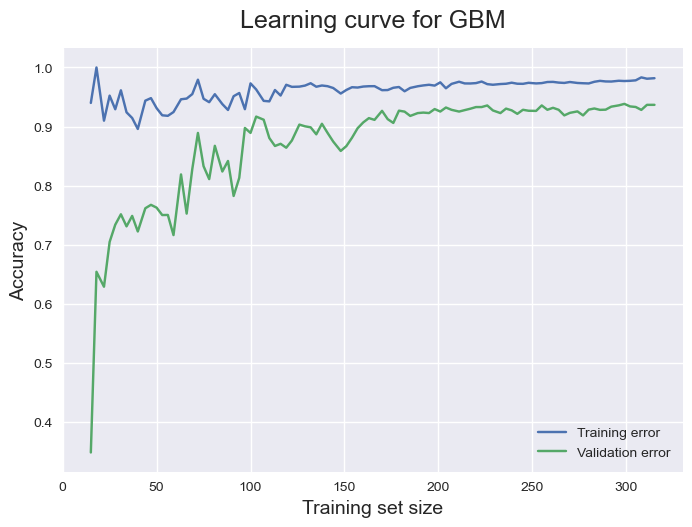

In [13]:
train_sizes, train_scores, test_scores = learning_curve(gbm_model, X, y, cv=10,
                                                        scoring='f1', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(test_scores, axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_mean, label = 'Training error')
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for GBM', fontsize = 18, y = 1.03)
plt.legend();

In [14]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

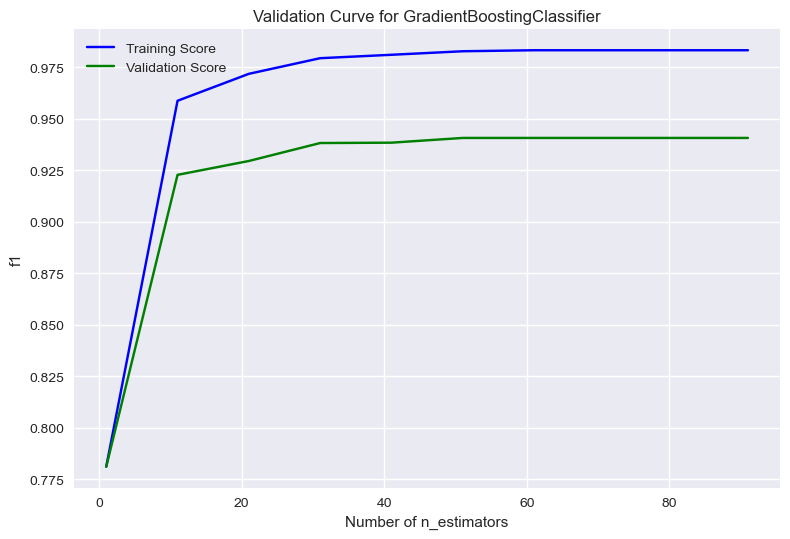

In [15]:
val_curve_params(gbm_model, X, y, "n_estimators", range(1,101,10), scoring="f1")

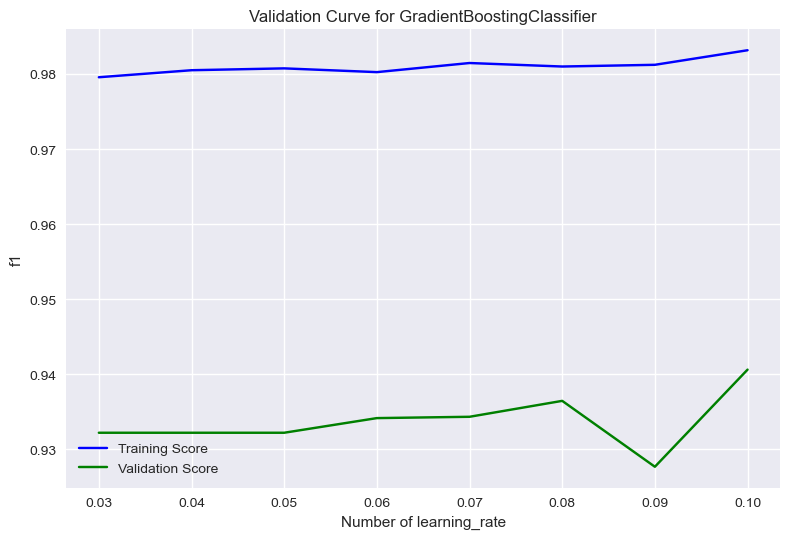

In [16]:
val_curve_params(gbm_model, X, y, "learning_rate", np.arange(0.03,0.1,0.01), scoring="f1")

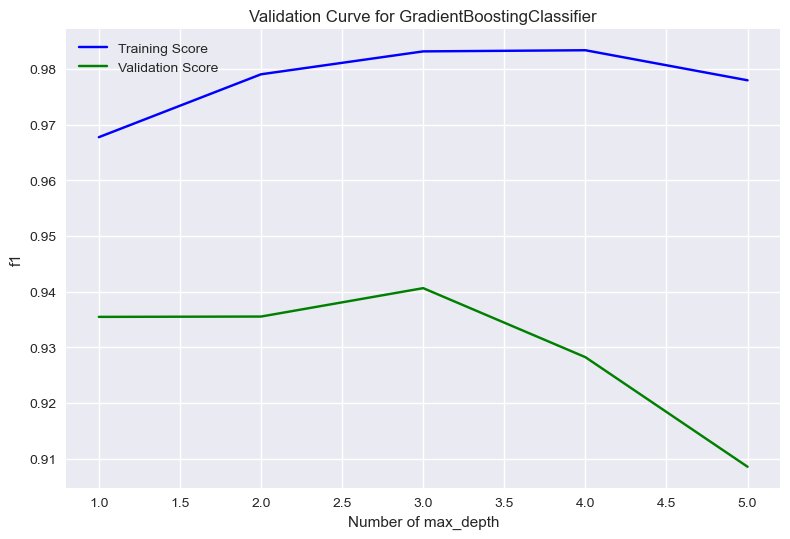

In [17]:
val_curve_params(gbm_model, X, y, "max_depth", range(1,6), scoring="f1")

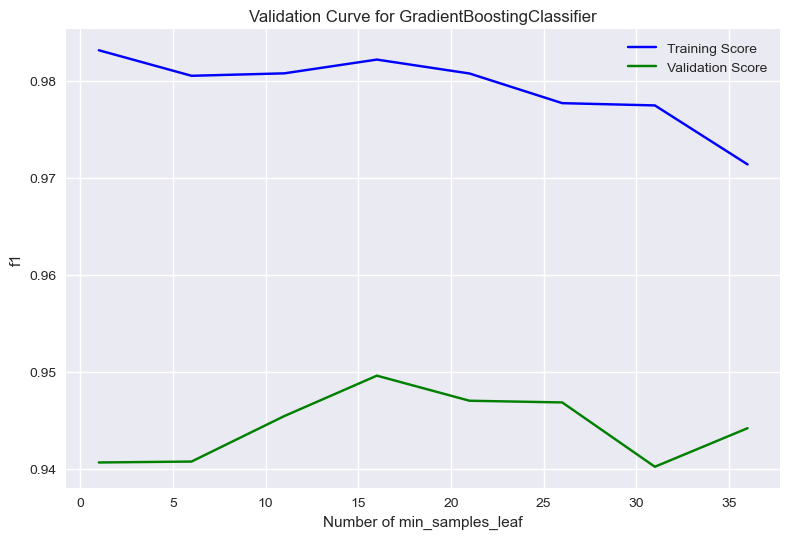

In [18]:
val_curve_params(gbm_model, X, y, "min_samples_leaf", range(1,41,5), scoring="f1")

In [19]:
gbm_params = {"learning_rate": [0.07,0.08],
              "max_depth": [1,2,3],
              "n_estimators": [10,20,30,40,50],
              "subsample": [0.5,0.6],
              "min_samples_split": range(12,16),
              "min_samples_leaf" : range(14,19),
              "max_features":[7,10,13]
             }

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


In [20]:
gbm_best_grid.best_params_

{'learning_rate': 0.08,
 'max_depth': 3,
 'max_features': 13,
 'min_samples_leaf': 18,
 'min_samples_split': 12,
 'n_estimators': 50,
 'subsample': 0.6}

In [21]:
gbm_best_grid.best_score_

0.9345674044265593

In [22]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_,
                                 random_state=17, ).fit(X, y)
# create final model with best gridsearch hyperparameters

In [23]:
cv_results_final = cross_validate(gbm_final, X, y, cv=10, 
                            scoring=["f1"],
                            return_train_score=True)
print("train f1 score:",cv_results_final['train_f1'].mean())
print("test f1 score:",cv_results_final['test_f1'].mean())

train f1 score: 0.9721391513320518
test f1 score: 0.9489728426060526


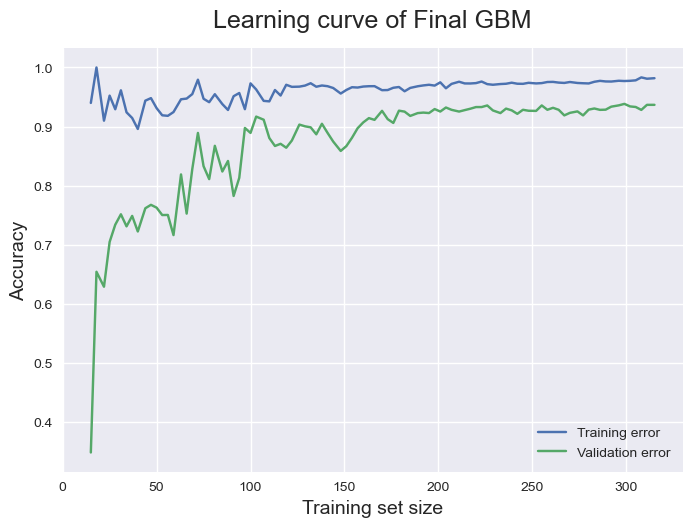

In [24]:
train_sizes_final, train_scores_final, test_scores_final = learning_curve(gbm_final, X, y,
                                                                          cv=10,
                                                        scoring='f1',n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean_final = np.mean(train_scores_final, axis=1)
validation_mean_final = np.mean(test_scores_final, axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes_final, train_mean, label = 'Training error')
plt.plot(train_sizes_final, validation_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve of Final GBM', fontsize = 18, y = 1.03)
plt.legend();

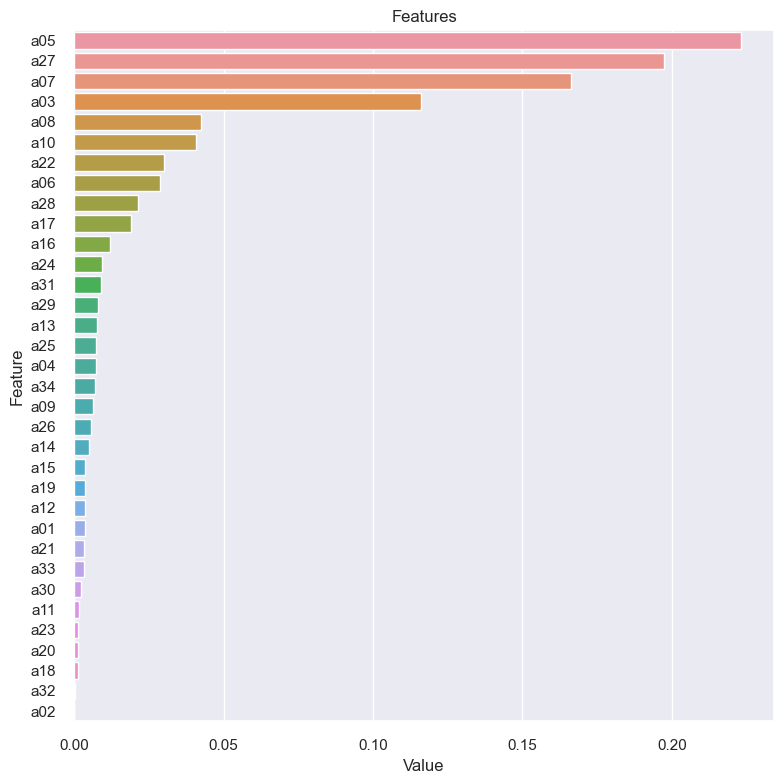

In [25]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(gbm_final, X)

In [26]:
#the most important variables are; a05,a27,a07,a03.
#Variables a32 and a02 have almost no effect on the model.
#https://www.kaggle.com/code/yasinnsariyildiz/gradient-boosting-machines-tutorial/notebook#What-is-Gradient-Boosting-Machines?